# FRAUD TRANSACTIONS PREDICTION

## OVERVIEW

The code implements fraud detection model using Machine learning algorithms. The model aims to proactively identify fraudulent transactions in a financial dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Fraud.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [5]:
df.shape

(6362620, 11)

In [6]:
df.size

69988820

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [8]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


In [9]:
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1429899,139,PAYMENT,4207.06,C79231737,6955.00,2747.94,M1981042370,0.00,0.00,0,0
1592465,156,PAYMENT,41411.66,C1196910173,49748.00,8336.34,M1414569575,0.00,0.00,0,0
3643467,275,CASH_OUT,75185.09,C166755793,177.00,0.00,C1628309449,0.00,75185.09,0,0
1087045,129,CASH_OUT,34161.90,C1688779685,0.00,0.00,C2033955666,452904.06,487065.96,0,0
5754637,399,CASH_IN,73099.54,C1186857784,23945549.21,24018648.75,C438147387,3718538.41,3645438.87,0,0


In [10]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [11]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [12]:
round(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest',]].describe().T,
      2)

,count,mean,std,min,25%,50%,75%,max
step,6362620.0000,243.4000,142.3300,1.0000,156.0000,239.0000,335.0000,743.0000
amount,6362620.0000,179861.9000,603858.2300,0.0000,13389.5700,74871.9400,208721.4800,92445516.6400
oldbalanceOrg,6362620.0000,833883.1000,2888242.6700,0.0000,0.0000,14208.0000,107315.1800,59585040.3700
newbalanceOrig,6362620.0000,855113.6700,2924048.5000,0.0000,0.0000,0.0000,144258.4100,49585040.3700
oldbalanceDest,6362620.0000,1100701.6700,3399180.1100,0.0000,0.0000,132705.6600,943036.7100,356015889.3500
newbalanceDest,6362620.0000,1224996.4000,3674128.9400,0.0000,0.0000,214661.4400,1111909.2500,356179278.9200


In [13]:
df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest','isFraud',
       'isFlaggedFraud']].corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.0000,0.0224,-0.0101,-0.0103,0.0277,0.0259,0.0316,0.0033
amount,0.0224,1.0000,-0.0028,-0.0079,0.2941,0.4593,0.0767,0.0123
oldbalanceOrg,-0.0101,-0.0028,1.0000,0.9988,0.0662,0.0420,0.0102,0.0038
newbalanceOrig,-0.0103,-0.0079,0.9988,1.0000,0.0678,0.0418,-0.0081,0.0038
oldbalanceDest,0.0277,0.2941,0.0662,0.0678,1.0000,0.9766,-0.0059,-0.0005
newbalanceDest,0.0259,0.4593,0.0420,0.0418,0.9766,1.0000,0.0005,-0.0005
isFraud,0.0316,0.0767,0.0102,-0.0081,-0.0059,0.0005,1.0000,0.0441
isFlaggedFraud,0.0033,0.0123,0.0038,0.0038,-0.0005,-0.0005,0.0441,1.0000


In [14]:
df[df['amount']==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736447,212,CASH_OUT,0.0000,C1510987794,0.0000,0.0000,C1696624817,0.0000,0.0000,1,0
3247298,250,CASH_OUT,0.0000,C521393327,0.0000,0.0000,C480398193,0.0000,0.0000,1,0
3760289,279,CASH_OUT,0.0000,C539112012,0.0000,0.0000,C1106468520,538547.6300,538547.6300,1,0
5563714,387,CASH_OUT,0.0000,C1294472700,0.0000,0.0000,C1325541393,7970766.5700,7970766.5700,1,0
5996408,425,CASH_OUT,0.0000,C832555372,0.0000,0.0000,C1462759334,76759.9000,76759.9000,1,0
5996410,425,CASH_OUT,0.0000,C69493310,0.0000,0.0000,C719711728,2921531.3400,2921531.3400,1,0
6168500,554,CASH_OUT,0.0000,C10965156,0.0000,0.0000,C1493336195,230289.6600,230289.6600,1,0
6205440,586,CASH_OUT,0.0000,C1303719003,0.0000,0.0000,C900608348,1328472.8600,1328472.8600,1,0
6266414,617,CASH_OUT,0.0000,C1971175979,0.0000,0.0000,C1352345416,0.0000,0.0000,1,0
6281483,646,CASH_OUT,0.0000,C2060908932,0.0000,0.0000,C1587892888,0.0000,0.0000,1,0


In [15]:
df[df['isFlaggedFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.0800,C728984460,4953893.0800,4953893.0800,C639921569,0.0000,0.0000,1,1
3247297,250,TRANSFER,1343002.0800,C1100582606,1343002.0800,1343002.0800,C1147517658,0.0000,0.0000,1,1
3760288,279,TRANSFER,536624.4100,C1035541766,536624.4100,536624.4100,C1100697970,0.0000,0.0000,1,1
5563713,387,TRANSFER,4892193.0900,C908544136,4892193.0900,4892193.0900,C891140444,0.0000,0.0000,1,1
5996407,425,TRANSFER,10000000.0000,C689608084,19585040.3700,19585040.3700,C1392803603,0.0000,0.0000,1,1
5996409,425,TRANSFER,9585040.3700,C452586515,19585040.3700,19585040.3700,C1109166882,0.0000,0.0000,1,1
6168499,554,TRANSFER,3576297.1000,C193696150,3576297.1000,3576297.1000,C484597480,0.0000,0.0000,1,1
6205439,586,TRANSFER,353874.2200,C1684585475,353874.2200,353874.2200,C1770418982,0.0000,0.0000,1,1
6266413,617,TRANSFER,2542664.2700,C786455622,2542664.2700,2542664.2700,C661958277,0.0000,0.0000,1,1
6281482,646,TRANSFER,10000000.0000,C19004745,10399045.0800,10399045.0800,C1806199534,0.0000,0.0000,1,1


In [16]:
df[(df['amount']==df['oldbalanceOrg']) & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


## DATA PREPROCESSING

In [17]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [18]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [19]:
df.duplicated().sum()

0

In [20]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

In [21]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


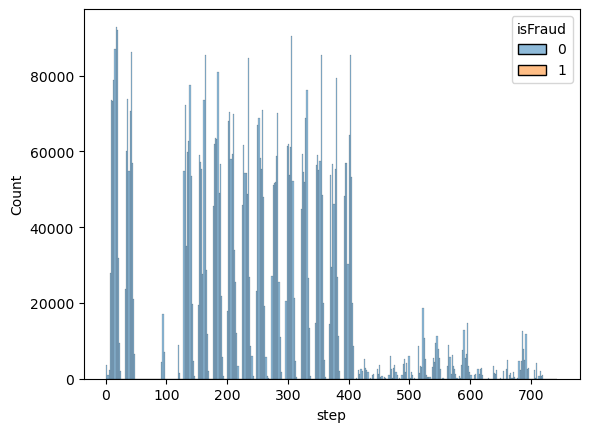

In [22]:
sns.histplot(x='step', data=df,hue='isFraud');

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='amount'>

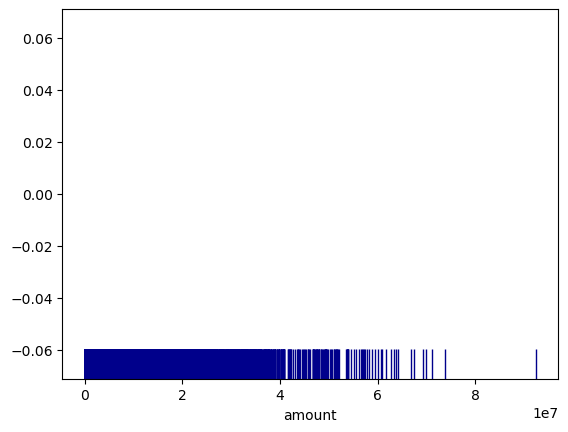

In [23]:
sns.rugplot(x='amount', data=df, height=.08, color='darkblue')

In [24]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

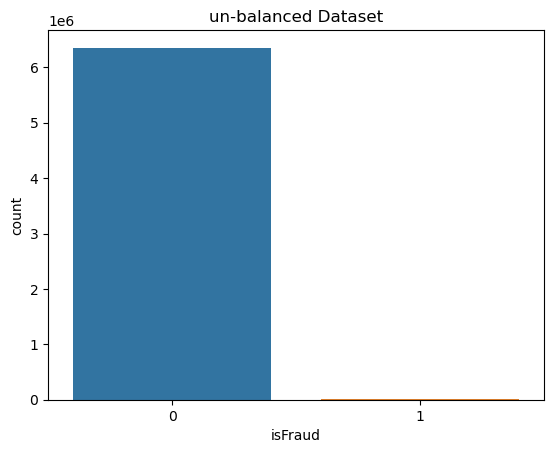

In [25]:
sns.countplot(x=df['isFraud'])
plt.title("un-balanced Dataset")
plt.show()

In [26]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


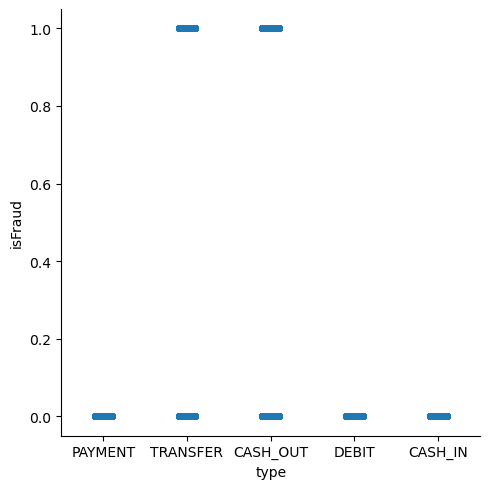

In [27]:
sns.catplot(data=df, x="type", y="isFraud")

Most of the Fraud transactions are performed on "TRANSFER" and "CASH_OUT" type.

In [28]:
df.loc[(df['type']=="CASH_OUT") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
252,1,CASH_OUT,2806.0000,C2101527076,2806.0000,0.0000,C1007251739,26202.0000,0.0000,1,0
681,1,CASH_OUT,20128.0000,C1118430673,20128.0000,0.0000,C339924917,6268.0000,12145.8500,1,0
724,1,CASH_OUT,416001.3300,C749981943,0.0000,0.0000,C667346055,102.0000,9291619.6200,1,0
970,1,CASH_OUT,1277212.7700,C467632528,1277212.7700,0.0000,C716083600,0.0000,2444985.1900,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362611,742,CASH_OUT,63416.9900,C994950684,63416.9900,0.0000,C1662241365,276433.1800,339850.1700,1,0
6362613,743,CASH_OUT,1258818.8200,C1436118706,1258818.8200,0.0000,C1240760502,503464.5000,1762283.3300,1,0
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0


In [29]:
df.loc[(df['type']=="TRANSFER") & (df['isFraud']==1)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
251,1,TRANSFER,2806.0000,C1420196421,2806.0000,0.0000,C972765878,0.0000,0.0000,1,0
680,1,TRANSFER,20128.0000,C137533655,20128.0000,0.0000,C1848415041,0.0000,0.0000,1,0
969,1,TRANSFER,1277212.7700,C1334405552,1277212.7700,0.0000,C431687661,0.0000,0.0000,1,0
1115,1,TRANSFER,35063.6300,C1364127192,35063.6300,0.0000,C1136419747,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.9900,C778071008,63416.9900,0.0000,C1812552860,0.0000,0.0000,1,0
6362612,743,TRANSFER,1258818.8200,C1531301470,1258818.8200,0.0000,C1470998563,0.0000,0.0000,1,0
6362614,743,TRANSFER,339682.1300,C2013999242,339682.1300,0.0000,C1850423904,0.0000,0.0000,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0


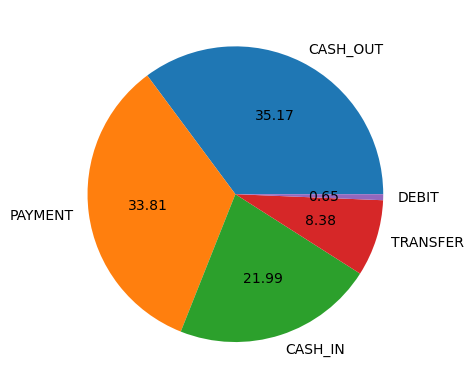

In [30]:
# Calculating individal % of each category of 'type' column in our transactions
#   using pie chart

plt.pie(x = df['type'].value_counts(),
       autopct='%.2f',labels=['CASH_OUT','PAYMENT','CASH_IN','TRANSFER','DEBIT'])
plt.show()

Approx. 69% transactions are of type "CASH_OUT" and "PAYMENT", due to which fraudulent agents targeted these two type.

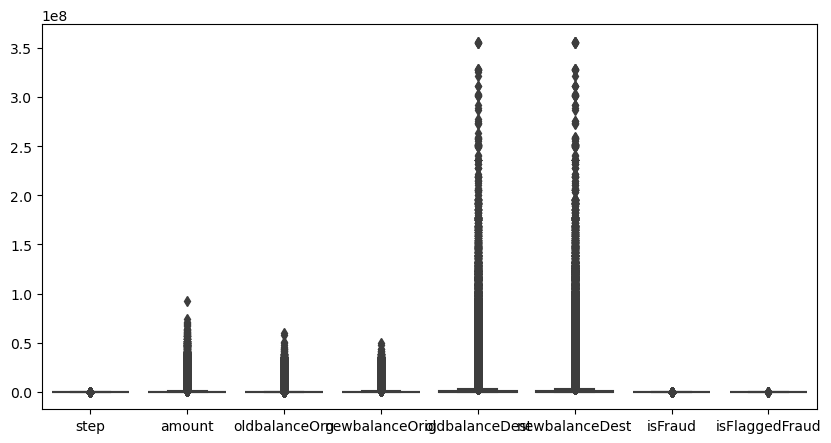

In [31]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df)
plt.show()

In [32]:
# using iqr method in "step" feature...

per25=df['step'].quantile(0.25)
per75=df['step'].quantile(0.75)
iqr=per75-per25
up_limit=per75+(1.5*iqr)
low_limit=per25-(1.5*iqr)
print("upper limit :- ",up_limit)
print("upper limit :- ",low_limit)

upper limit :-  603.5
upper limit :-  -112.5


In [33]:
df[df["step"]>603]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6259932,604,TRANSFER,714218.4800,C454938739,714218.4800,0.0000,C482986731,0.0000,0.0000,1,0
6259933,604,CASH_OUT,714218.4800,C1835708623,714218.4800,0.0000,C1881116283,106940.8300,821159.3100,1,0
6259934,604,TRANSFER,277582.5300,C2144116571,277582.5300,0.0000,C570246252,0.0000,0.0000,1,0
6259935,604,CASH_OUT,277582.5300,C1512896686,277582.5300,0.0000,C731882373,0.0000,277582.5300,1,0
6259936,604,TRANSFER,4672401.0400,C801580496,4672401.0400,0.0000,C1917884973,0.0000,0.0000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.1300,C786484425,339682.1300,0.0000,C776919290,0.0000,339682.1300,1,0
6362616,743,TRANSFER,6311409.2800,C1529008245,6311409.2800,0.0000,C1881841831,0.0000,0.0000,1,0
6362617,743,CASH_OUT,6311409.2800,C1162922333,6311409.2800,0.0000,C1365125890,68488.8400,6379898.1100,1,0
6362618,743,TRANSFER,850002.5200,C1685995037,850002.5200,0.0000,C2080388513,0.0000,0.0000,1,0


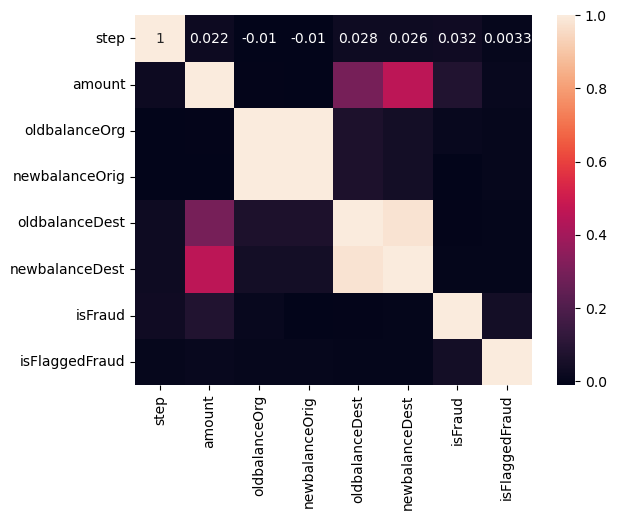

In [34]:
sns.heatmap(df[['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig','oldbalanceDest',
                'newbalanceDest', 'isFraud','isFlaggedFraud']].corr(),
            annot=True
           )
plt.show()

In [35]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Compute the correlation with the "isFraud" column
correlation_with_isFraud = numeric_df.corr()["isFraud"]

# Display the correlation values
print(correlation_with_isFraud)


step              0.0316
amount            0.0767
oldbalanceOrg     0.0102
newbalanceOrig   -0.0081
oldbalanceDest   -0.0059
newbalanceDest    0.0005
isFraud           1.0000
isFlaggedFraud    0.0441
Name: isFraud, dtype: float64


## Feature Selection

In [36]:
# function which returns un_important features ( only numeric ).

def correlation(dataset,threshold):
    
    """ 
    used to store un_important column names
    and set() type stores only unique values
    so, that no duplicated column name will store.
    """
    column_corr=set()
    
    # storing correlation matrix
    corr_matrix=dataset.corr()
    
    for i in range (len(corr_matrix.columns)):
        for j in range (i):
            
            # comparing corr. values with threshold
            if corr_matrix.iloc[i,j]>threshold:
                
                # if true, then fateching column name
                colname=corr_matrix.columns[i]
                
                # adding column name to column_corr variable.
                column_corr.add(colname)
    return column_corr

In [37]:
def correlation(df, threshold=0.9):
    # Select only numeric columns
    numeric_df = df.select_dtypes(include=[float, int])
    
    # Compute the correlation matrix
    corr_matrix = numeric_df.corr()
    
    # Identify features with a correlation greater than or equal to the threshold with "isFraud"
    correlated_features = corr_matrix["isFraud"].abs()[corr_matrix["isFraud"].abs() >= threshold].index.tolist()
    
    return correlated_features

# Call the function with the threshold value of 0.9
correlated_features = correlation(df, 0.9)

# Display the correlated features
print(correlated_features)

['isFraud']


In [38]:
# total number of un_important features
len(set(correlated_features))


1

In [39]:
# name of these columns ( independent features)
correlated_features

['isFraud']

In [40]:
label_column = "isFraud"
features_to_drop = [feature for feature in correlated_features if feature != label_column]

# Drop the correlated features except the label column
df = df.drop(features_to_drop, axis=1)

In [41]:
# After removing ...
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,C1231006815,170136.0000,160296.3600,M1979787155,0.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,C1666544295,21249.0000,19384.7200,M2044282225,0.0000,0.0000,0,0
2,1,TRANSFER,181.0000,C1305486145,181.0000,0.0000,C553264065,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,C840083671,181.0000,0.0000,C38997010,21182.0000,0.0000,1,0
4,1,PAYMENT,11668.1400,C2048537720,41554.0000,29885.8600,M1230701703,0.0000,0.0000,0,0


In [42]:
from sklearn.feature_selection import VarianceThreshold

In [43]:
"""
threshold=0  means feature having only 1 value ( no variation)
threshold=1 means feature having 2 different values ( small variation)
etc
"""
Var_Thresh=VarianceThreshold(threshold=0)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True,  True])

In [44]:
# when threshold=1

Var_Thresh=VarianceThreshold(threshold=1)
Var_Thresh.fit(df[['step','amount','oldbalanceOrg','oldbalanceDest','isFlaggedFraud']])
Var_Thresh.get_support()

array([ True,  True,  True,  True, False])

In [45]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [46]:
print(" type having these unique values :- \n",df["type"].unique())
print("\n\n nameOrig having these unique values :- \n",df["nameOrig"].unique())
print("\n\n nameDest having these unique values :- \n",df["nameDest"].unique())

 type having these unique values :- 
 ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


 nameOrig having these unique values :- 
 ['C1231006815' 'C1666544295' 'C1305486145' ... 'C1162922333' 'C1685995037'
 'C1280323807']


 nameDest having these unique values :- 
 ['M1979787155' 'M2044282225' 'C553264065' ... 'C1850423904' 'C1881841831'
 'C2080388513']


In [47]:
df['nameOrig'].value_counts()

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: count, Length: 6353307, dtype: int64

In [48]:
df['nameDest'].value_counts()

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: count, Length: 2722362, dtype: int64

In [49]:
df=df.drop({'nameOrig','nameDest'},axis=1)

In [50]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0,0
1,1,PAYMENT,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0,0
2,1,TRANSFER,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,CASH_OUT,181.0000,181.0000,0.0000,21182.0000,0.0000,1,0
4,1,PAYMENT,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0,0


## FEATURE ENCODING

In [51]:
df["type"].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [52]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [53]:
df['type']=df['type'].map({'CASH_OUT':5, 'PAYMENT':4,'CASH_IN':3,'TRANSFER':2,'DEBIT':1})

In [54]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,5,181.0000,181.0000,0.0000,21182.0000,0.0000,1,0
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0,0


In [55]:
df["type"].unique()

array([4, 2, 5, 1, 3], dtype=int64)

In [56]:
df["type"].value_counts()

type
5    2237500
4    2151495
3    1399284
2     532909
1      41432
Name: count, dtype: int64

## Handling Unbalanced Data

In [57]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [58]:
"""
Creating 2 new DataFrame ,
one contain fraud transaction
and another one contain genuine transaction
"""
normal_transaction=df[df['isFraud']==0]
fraud_transaction=df[df['isFraud']==1]

In [59]:
normal_transaction.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,46042.2900,0.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,176087.2300,0.0000,0.0000,0,0


In [60]:
fraud_transaction.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,2,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,5,181.0000,181.0000,0.0000,21182.0000,0.0000,1,0
251,1,2,2806.0000,2806.0000,0.0000,0.0000,0.0000,1,0
252,1,5,2806.0000,2806.0000,0.0000,26202.0000,0.0000,1,0
680,1,2,20128.0000,20128.0000,0.0000,0.0000,0.0000,1,0


In [61]:
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 9)
(8213, 9)


In [62]:
"""
Now, we have 50-50% fraud and normal transaction data.
next step is to concatenating them
"""
print(normal_transaction.shape)
print(fraud_transaction.shape)

(6354407, 9)
(8213, 9)


In [63]:
normal_transaction['amount'].describe()

count    6354407.0000
mean      178197.0417
std       596236.9813
min            0.0100
25%        13368.3950
50%        74684.7200
75%       208364.7600
max     92445516.6400
Name: amount, dtype: float64

In [64]:
fraud_transaction['amount'].describe()

count       8213.0000
mean     1467967.2991
std      2404252.9472
min            0.0000
25%       127091.3300
50%       441423.4400
75%      1517771.4800
max     10000000.0000
Name: amount, dtype: float64

In [65]:
# Concatenating these two dataset , to remove un-balanced dataset problem

# axis=0 means adding at rows
new_df=pd.concat([normal_transaction,fraud_transaction], axis=0)

In [66]:
new_df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0,0
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0,0
5,1,4,7817.7100,53860.0000,46042.2900,0.0000,0.0000,0,0
6,1,4,7107.7700,183195.0000,176087.2300,0.0000,0.0000,0,0


In [67]:
new_df.tail()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,5,339682.1300,339682.1300,0.0000,0.0000,339682.1300,1,0
6362616,743,2,6311409.2800,6311409.2800,0.0000,0.0000,0.0000,1,0
6362617,743,5,6311409.2800,6311409.2800,0.0000,68488.8400,6379898.1100,1,0
6362618,743,2,850002.5200,850002.5200,0.0000,0.0000,0.0000,1,0
6362619,743,5,850002.5200,850002.5200,0.0000,6510099.1100,7360101.6300,1,0


In [68]:
new_df.shape

(6362620, 9)

## Handling Unbalanced Data

In [69]:
# independent features
X=new_df.drop("isFraud",axis=1)

# dependent feature
y=new_df["isFraud"]

In [70]:
X.shape

(6362620, 8)

In [71]:
y.shape

(6362620,)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
# stratify will evenly distribute the data values

x_train,x_test,y_train,y_test=train_test_split(X , y , test_size=0.2, stratify=y , random_state=0)

In [74]:
print("x-train :- ", x_train.shape)
print("x-test :-  ",  x_test.shape)
print("y-train :- ", y_train.shape)
print("y-test :-  ",  y_test.shape)

x-train :-  (5090096, 8)
x-test :-   (1272524, 8)
y-train :-  (5090096,)
y-test :-   (1272524,)


In [75]:
y_test.value_counts()

isFraud
0    1270881
1       1643
Name: count, dtype: int64

In [76]:
y_train.value_counts()

isFraud
0    5083526
1       6570
Name: count, dtype: int64

## Feature Scaling

In [77]:
from sklearn.preprocessing import StandardScaler

In [78]:
scaler=StandardScaler()

In [79]:
scaler.fit(x_train)

StandardScaler()

In [80]:
x_train_scaler=scaler.transform(x_train)

In [81]:
x_test_scaler=scaler.transform(x_test)

In [82]:
x_train_scaler

array([[-5.92946318e-01, -9.63243996e-01, -3.90787710e-02, ...,
         7.20230919e-01,  5.89706094e-01, -1.53542338e-03],
       [-6.28074341e-01,  5.63167492e-02, -2.81528227e-01, ...,
        -3.22519636e-01, -3.31816434e-01, -1.53542338e-03],
       [ 4.46843174e-01,  1.07587749e+00, -1.82465712e-01, ...,
         7.17033107e-01,  6.47738850e-01, -1.53542338e-03],
       ...,
       [ 8.12174617e-01,  5.63167492e-02, -2.88456082e-01, ...,
        -3.22519636e-01, -3.31816434e-01, -1.53542338e-03],
       [-1.40791646e+00,  1.07587749e+00, -1.98979516e-01, ...,
         2.88322205e+00,  2.64723604e+00, -1.53542338e-03],
       [-2.97870922e-01, -9.63243996e-01,  2.76674992e-01, ...,
        -1.33733663e-01, -2.51589928e-01, -1.53542338e-03]])

In [83]:
x_test_scaler

array([[-7.40484016e-01,  1.07587749e+00, -1.42297506e-01, ...,
        -3.22519636e-01, -3.06511316e-01, -1.53542338e-03],
       [-1.61165900e+00, -9.63243996e-01, -2.37726168e-01, ...,
        -2.90437589e-01, -3.11760234e-01, -1.53542338e-03],
       [-1.40089086e+00,  5.63167492e-02, -2.88887389e-01, ...,
        -3.22519636e-01, -3.31816434e-01, -1.53542338e-03],
       ...,
       [-1.45709569e+00,  1.07587749e+00,  1.24869563e-03, ...,
         3.25651026e-02,  4.53226923e-02, -1.53542338e-03],
       [ 2.57151848e-01,  5.63167492e-02, -2.77198012e-01, ...,
        -3.22519636e-01, -3.31816434e-01, -1.53542338e-03],
       [-7.82637644e-01,  1.07587749e+00, -3.20797551e-02, ...,
        -1.40012099e-01, -1.19676912e-01, -1.53542338e-03]])

## Training and Evaluting model

## Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
log_model=LogisticRegression()

In [86]:
log_model.fit(x_train_scaler,y_train)

LogisticRegression()

In [87]:
y_pred=log_model.predict(x_test_scaler)

In [88]:
# for accuracy check :- 

from sklearn.metrics import accuracy_score

In [89]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
99.92149460442397
- - - - - - - - - - -


## Random Forest Classifier

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rand_model=RandomForestClassifier()

In [92]:
rand_model.fit(x_train_scaler,y_train)

RandomForestClassifier()

In [93]:
y_pred=rand_model.predict(x_test_scaler)

In [94]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
99.96825207225955
- - - - - - - - - - -


## Support Vector Machine (SVM)

In [95]:
from sklearn.svm import SVC

In [96]:
svm_model=SVC()

In [97]:
svm_model.fit(x_train_scaler,y_train)

SVC()

In [98]:
y_pred=svm_model.predict(x_test_scaler)

In [99]:
print("- - - - - - - - - - -")
print(accuracy_score(y_test.values,y_pred)*100)
print("- - - - - - - - - - -")

- - - - - - - - - - -
99.93053176207286
- - - - - - - - - - -


In [101]:
# create a copy of the original dataframe
df_new = df.copy()
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,5,181.0000,181.0000,0.0000,21182.0000,0.0000,1,0
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0,0


## Label Encoding

In [102]:
# check object datatypes
objList = df_new.select_dtypes(include = "object").columns
print(objList)

Index([], dtype='object')


In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
# encode the objects
le = LabelEncoder()

for f in objList:
    df_new[f] = le.fit_transform(df_new[f].astype(str))

print(df_new.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
 8   isFlaggedFraud  int64  
dtypes: float64(5), int64(4)
memory usage: 436.9 MB
None


In [106]:
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,4,9839.6400,170136.0000,160296.3600,0.0000,0.0000,0,0
1,1,4,1864.2800,21249.0000,19384.7200,0.0000,0.0000,0,0
2,1,2,181.0000,181.0000,0.0000,0.0000,0.0000,1,0
3,1,5,181.0000,181.0000,0.0000,21182.0000,0.0000,1,0
4,1,4,11668.1400,41554.0000,29885.8600,0.0000,0.0000,0,0


## Multicollinearity

In [108]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [109]:
# function to find the variation inflation factor
def cal_vif(df):
    vif = pd.DataFrame()
    vif['variables'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return vif

cal_vif(df_new)

,variables,VIF
0,step,3.4777
1,type,3.3725
2,amount,4.0793
3,oldbalanceOrg,546.4622
4,newbalanceOrig,548.7090
5,oldbalanceDest,72.8966
6,newbalanceDest,84.5904
7,isFraud,1.1900
8,isFlaggedFraud,1.0025


In [113]:
# creating new features to capture the change in balances and transaction paths
df_new['Actual_amount_orig'] = df_new.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
df_new['Actual_amount_dest'] = df_new.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
#df_new['TransactionPath'] = df_new.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#Dropping columns
df_new = df_new.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','step'],axis=1)

cal_vif(df_new)

,variables,VIF
0,type,1.0806
1,amount,3.8155
2,isFraud,1.1768
3,isFlaggedFraud,1.0025
4,Actual_amount_orig,1.2091
5,Actual_amount_dest,3.7319


## Preparing model for deployment

## Scaling the Data

In [114]:
# scale the dataset
scaler = StandardScaler()
df_new["NormalizedAmount"] = scaler.fit_transform(df_new["amount"].values.reshape(-1, 1))
df_new.drop(["amount"], inplace= True, axis= 1)

Y = df_new["isFraud"]
X = df_new.drop(["isFraud"], axis= 1)

## Splitting the Data

In [115]:
# split the dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 5)
Shape of X_test:  (1908786, 5)


## Model Training

In [117]:
from sklearn.tree import DecisionTreeClassifier

In [118]:
# Decision Tree
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)

Y_pred_dt = dtc.predict(X_test)
dtc_score = dtc.score(X_test, Y_test) * 100

In [119]:
from sklearn.ensemble import RandomForestClassifier

In [120]:
# Random Forest
rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train, Y_train)

Y_pred_rf = rfc.predict(X_test)
rfc_score = rfc.score(X_test, Y_test) * 100

In [122]:
from xgboost import XGBClassifier

In [123]:
# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, Y_train)

Y_pred_xgb = xgb.predict(X_test)
xgb_score = xgb.score(X_test, Y_test) * 100

In [124]:
print("Decision Tree Score: ", dtc_score)
print("Random Forest Score: ", rfc_score)
print("XGBoost Score      : ", xgb_score)

Decision Tree Score:  99.92482132622516
Random Forest Score:  99.93095087663049
XGBoost Score      :  99.95798376559762


XGBoost is better than Decision Tree and Random Forest Classifier.

In [126]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [127]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - XGB

print("TP,FP,TN,FN - XGBoost")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_xgb).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 1734
False Positives: 734
True Negatives: 1905617
False Negatives: 701
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 1733
False Positives: 616
True Negatives: 1905735
False Negatives: 702
----------------------------------------------------------------------------------------
TP,FP,TN,FN - XGBoost
True Positives: 1671
False Positives: 38
True Negatives: 1906313
False Negatives: 764


TP(Decision Tree) ~ TP(Random Forest) ~ TP(XGBoost) so no competetion here.

FP(Decision Tree) >> FP(Random Forest) >> FP(XGBoost) - XGBoost has an edge here.

TN(Decision Tree) < TN(Random Forest) < TN(XGBoost) - Random Forest is better here too

FN(Decision Tree) ~ FN(Random Forest) ~ FN(XGBoost)

XGBoost Classifier works more good in this scenario.

In [128]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

print("----------------------------------------------------------------------------------------")

# confusion matrix - XGB

confusion_matrix_xgb = confusion_matrix(Y_test, Y_pred_xgb.round())
print('Confusion Matrix - XGBoost')
print(confusion_matrix_xgb)

Confusion Matrix - Decision Tree
[[1905617     734]
 [    701    1734]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[1905735     616]
 [    702    1733]]
----------------------------------------------------------------------------------------
Confusion Matrix - XGBoost
[[1906313      38]
 [    764    1671]]


In [129]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

print("----------------------------------------------------------------------------------------")

# classification report - XGB

classification_report_xgb = classification_report(Y_test, Y_pred_xgb)
print("Classification Report - XGBoost")
print(classification_report_xgb)

Classification Report - Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.70      0.71      0.71      2435

    accuracy                           1.00   1908786
   macro avg       0.85      0.86      0.85   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.74      0.71      0.72      2435

    accuracy                           1.00   1908786
   macro avg       0.87      0.86      0.86   1908786
weighted avg       1.00      1.00      1.00   1908786

----------------------------------------------------------------------------------------
Classification Report - XGBoost
              precision    recall  f1-score   support

     

With Such a good precision and hence F1-Score, XGBoost comes out to be better as expected.

## Plotting Confusion matrix

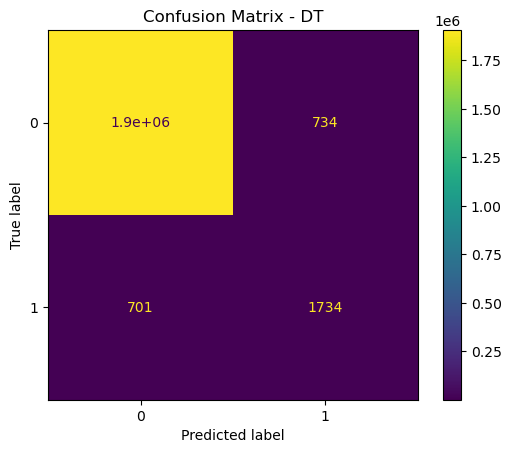

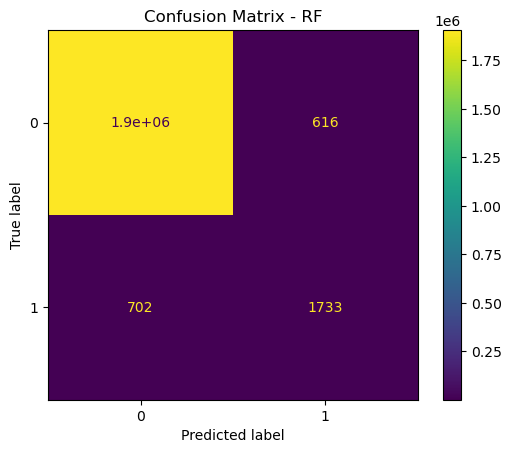

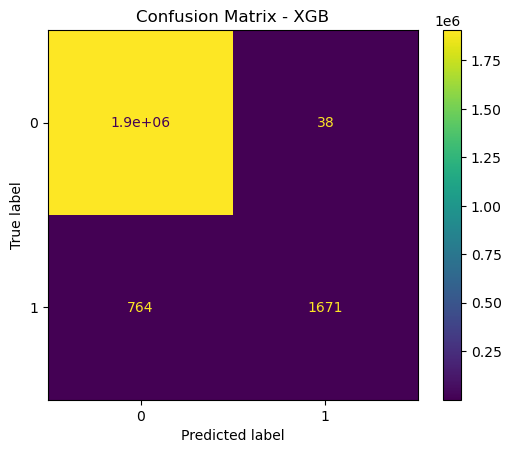

In [130]:
# visualising confusion matrix - DT

disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

# visualising confusion matrix - XGB
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_xgb)
disp.plot()
plt.title('Confusion Matrix - XGB')
plt.show()

## Plotting ROC curves

In [132]:
import sklearn.metrics as metrics

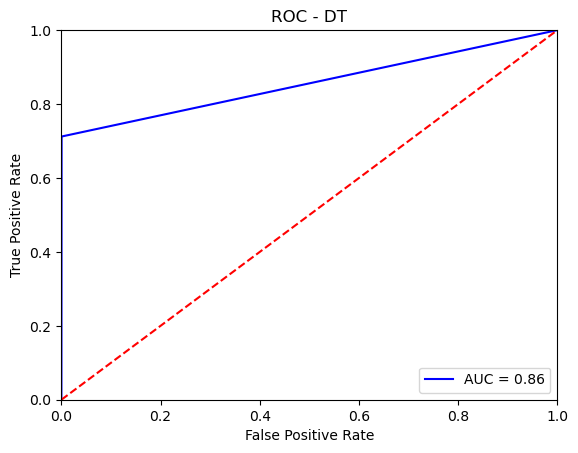

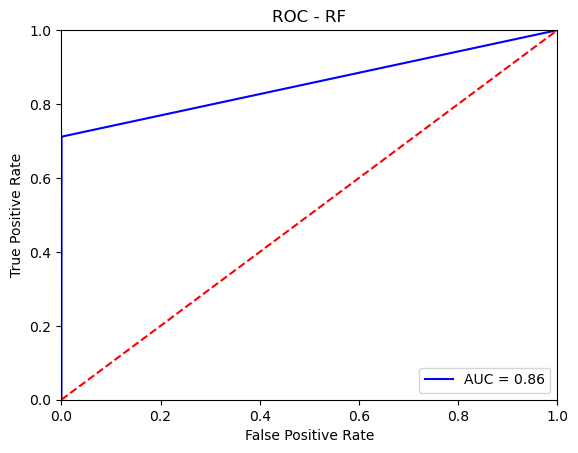

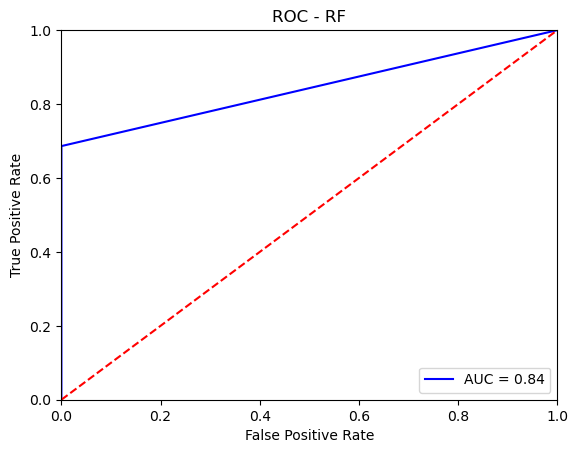

In [133]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - XGB
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_xgb)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The AUC ROC for Decision Tree, Random Forest and XGBoost is equal, so all these three models are pretty good.

## CONCLUSION
In our analysis, we observed that while the accuracy of the Random Forest, Decision Tree, and XGBoost models is comparable, XGBoost outperforms the others in terms of precision. Precision is a critical metric in fraud detection because the primary goal is to correctly identify fraudulent transactions while minimizing the misclassification of legitimate ones. A model with high precision ensures that the flagged transactions are more likely to be actual frauds, reducing the risk of false positives, which can be costly and disruptive.

This importance of precision in fraud detection highlights why ensemble methods like XGBoost are often preferred over single algorithms. XGBoost, in particular, is effective with imbalanced datasets, such as ours where the ratio of legitimate to fraudulent transactions is heavily skewed (Legit: Fraud :: 6,354,407: 8,213). XGBoost works by iteratively combining multiple decision trees to refine its predictions, which enhances its ability to correctly identify rare fraudulent transactions.

While models like Bagging, Artificial Neural Networks (ANN), and Logistic Regression can achieve high accuracy, they may not perform as well in terms of precision and recall. These metrics are crucial in ensuring that the model effectively distinguishes between fraudulent and non-fraudulent transactions, especially in a highly imbalanced dataset. Therefore, XGBoost is an optimal choice for this context, offering a balance between accuracy and precision, and making it a robust solution for detecting fraud in financial transactions.